In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os

%matplotlib inline

In [8]:
def symbol_to_path(symbol, base_dir=None):
    """Return CSV file path given ticker symbol."""
    if base_dir is None:
        base_dir = os.environ.get("MARKET_DATA_DIR", '../ML4T_2017Summer-master/data/')
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [9]:
def get_data(symbols, dates, addSPY=True, colname = 'Adj Close'):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if addSPY and 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols = ['SPY'] + symbols

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', colname], na_values=['nan'])
        df_temp = df_temp.rename(columns={colname: symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

In [10]:
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    # Get daily portfolio value   ******
    normed = prices / prices.ix[0,:]  # normalizes data in each column
    alloced = normed * allocs   # applies allocation of starting value invested to each symbol on each day
    pos_vals = alloced * sv    # applies starting value invested to each symbol
    port_val = pos_vals.sum(axis=1).round(2)  # calculates total portfolio value each day
    
    
    # Calculate Daily Returns   ******  
    daily_returns = (port_val / port_val.shift(1)) - 1
    daily_returns.ix[0] = 0
    daily_returns = daily_returns.ix[1:]

    
    # Get portfolio statistics (note: std_daily_ret = volatility)   ******
    
    cr = (port_val.ix[-1,:] / port_val.ix[0,:]) - 1  # Cumulative Return
    adr = daily_returns.mean()  # Average Daily Return
    sddr = daily_returns.std()  # STD of Daily Return
    sr = np.sqrt(sf) * (adr - rfr) / sddr  # Sharpe Ratio
    
    
    # Compare daily portfolio value with SPY using a normalized plot   ******
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
        df_temp_norm = df_temp / df_temp.ix[0,:]
        ax = df_temp_norm.plot(title='Normalized Stock Prices')
        ax.set_xlabel('Date')
        ax.set_ylabel('Normalized Price')
        plt.show()
        pass

    # Add code here to properly compute end value   ******
    ev = port_val[-1]

    return cr, adr, sddr, sr, ev, prices, port_val


In [17]:
def test_code():
    # This code WILL NOT be tested by the auto grader
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!
    start_date = dt.datetime(2009,1,1)
    end_date = dt.datetime(2010,1,1)
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev, prices, port_val = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = True)

    # Print statistics
    print "Start Date:", start_date
    print "End Date:", end_date
    print "Symbols:", symbols
    print "Allocations:", allocations
    print "Sharpe Ratio:", sr
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr
    
    return cr, adr, sddr, sr, ev, prices, port_val

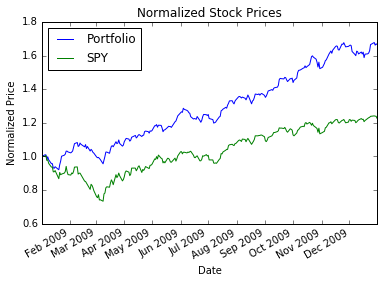

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.79622138177
Volatility (stdev of daily returns): 0.0119577327802
Average Daily Return: 0.00210629950604
Cumulative Return: 0.6657866


In [18]:
if __name__ == "__main__":
    test_code()

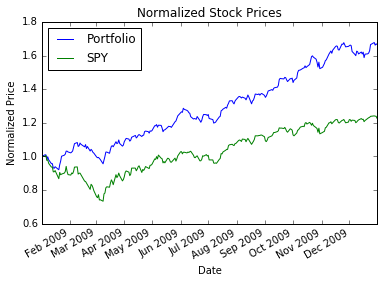

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.79622138177
Volatility (stdev of daily returns): 0.0119577327802
Average Daily Return: 0.00210629950604
Cumulative Return: 0.6657866


In [19]:
cr, adr, sddr, sr, ev, prices, port_val = test_code()

In [21]:
port_val.head()

2009-01-02    1000000.00
2009-01-05    1008740.32
2009-01-06    1008692.45
2009-01-07     981001.05
2009-01-08     997510.76
dtype: float64

In [23]:
sd = dt.datetime(2009,1,1)
ed = dt.datetime(2010,1,1)
syms = ['GOOG','AAPL','GLD','XOM']
allocs=[0.2, 0.3, 0.4, 0.1]
sv=1000000

normed = prices / prices.ix[0,:]  # normalizes data in each column
alloced = normed * allocs   # applies allocation of starting value invested to each symbol on each day
pos_vals = alloced * sv    # applies starting value invested to each symbol
port_val = pos_vals.sum(axis=1).round(2)  # calculates total portfolio value of each day
#port_val = pd.DataFrame(data=port_val, columns=['Port_Val'])  # convert array to a dataframe
port_val.head()

2009-01-02    1000000.00
2009-01-05    1008740.32
2009-01-06    1008692.45
2009-01-07     981001.05
2009-01-08     997510.76
dtype: float64

In [275]:
# Cumulative Return
cr = (port_val.ix[-1,:] / port_val.ix[0,:]) - 1
cr

0.66578660000000012

In [277]:
# Average Daily Return
adr = daily_returns.mean()
adr

0.0021062995060402859

In [278]:
# STD of Daily Return
stddr = daily_returns.std()
stddr

0.011957732780245867

In [279]:
# Sharpe Ratio
sr = np.sqrt(252) * (adr - 0) / stddr
sr

2.7962213817690964

In [ ]:
# Daily Returns
daily_returns = (port_val / port_val.shift(1)) - 1
daily_returns.ix[0] = 0
daily_returns = daily_returns.ix[1:]
daily_returns.head()